In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

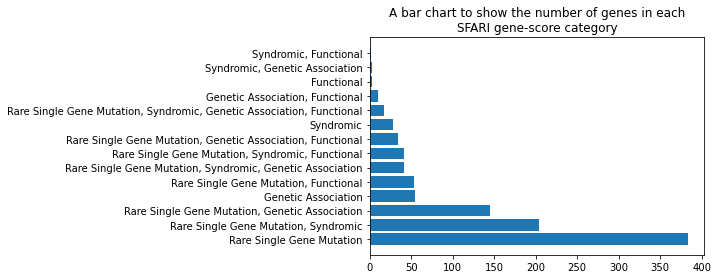

In [4]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

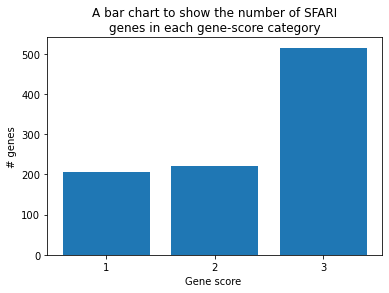

In [42]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

# task 2

In [4]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

# task 4

In [18]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [19]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [20]:
year_data2 = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())

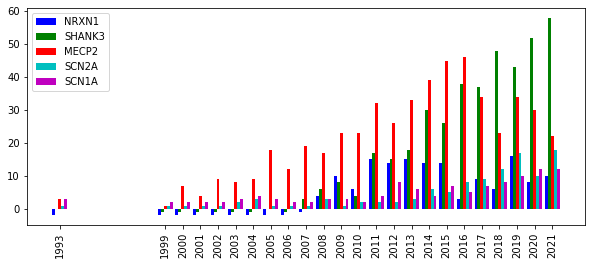

In [22]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

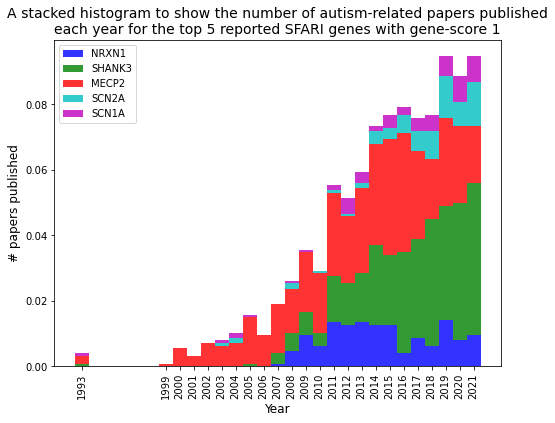

In [56]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related papers published\neach year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [31]:
year_data2

[[2017,
  2020,
  2008,
  2019,
  2021,
  2017,
  2019,
  2020,
  2019,
  2017,
  2018,
  2013,
  2013,
  2013,
  2014,
  2011,
  2019,
  2012,
  2021,
  2016,
  2019,
  2019,
  2020,
  2018,
  2015,
  2011,
  2009,
  2015,
  2020,
  2012,
  2013,
  2007,
  2012,
  2013,
  2020,
  2020,
  2019,
  2016,
  2009,
  2012,
  2017,
  2010,
  2011,
  2009,
  2011,
  2018,
  2012,
  2021,
  2012,
  2009,
  2011,
  2020,
  2020,
  2019,
  2017,
  2011,
  2010,
  2017,
  2021,
  2012,
  2019,
  2014,
  2014,
  2013,
  2018,
  2012,
  2011,
  2011,
  2010,
  2015,
  2015,
  2013,
  2012,
  2009,
  2012,
  2014,
  2013,
  2015,
  2009,
  2013,
  2019,
  2019,
  2021,
  2019,
  2021,
  2015,
  2015,
  2021,
  2012,
  2012,
  2017,
  2019,
  2014,
  2011,
  2014,
  2009,
  2010,
  2019,
  2014,
  2015,
  2014,
  2019,
  2013,
  2011,
  2014,
  2013,
  2017,
  2015,
  2008,
  2014,
  2021,
  2009,
  2014,
  2008,
  2012,
  2021,
  2010,
  2009,
  2011,
  2015,
  2019,
  2020,
  2016,
  2013,
  2018,


# task 5

In [89]:
for i in range(5):
    print(len(year_data2[i]))

173
420
517
87
68
